In [100]:
import cv2
import os

import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


from PIL import Image, ImageChops
import pickle 

# Data Visualization

In [4]:
folder_path_authentic = "data\\traindev\\authentic"
folder_path_copy = "data\\traindev\\copy-moved\\images"
folder_path_spliced = "data\\traindev\\spliced\\images"

Creating the dataset

In [5]:
def create_dataframe(folder_path, label, ori_label):
    images = []
    labels = []
    original_labels = []
    for filename in os.listdir(folder_path):
        
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
            
        image_width, image_height = 128, 128
        image = cv2.resize(image, (image_width, image_height))
        images.append(image)
        labels.append(label)
        original_labels.append(ori_label)
    return images, labels , original_labels


In [6]:
def create_masks_dataframe(folder_path):
    masks = []
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
            
        image_width, image_height = 128, 128
        image = cv2.resize(image, (image_width, image_height))
        masks.append(image)
            
    return masks


Labels

0 - Authentic Image
1 - Copy-move forgery
2 - Spliced forgery

In [7]:
authentic_images, authentic_labels, auth_ori_label = create_dataframe(folder_path_authentic, 0, 0)
copy_images , copy_labels, copy_ori_label = create_dataframe(folder_path_copy, 1, 1)
sliced_images, sliced_labels, sliced_ori_label = create_dataframe(folder_path_spliced, 1, 2)

In [8]:
print(f'Number of Authentic images is {len(authentic_images)}')
print(f'Number of Copy-moved images is {len(copy_images)}')
print(f'Number of spliced images is {len(sliced_images)}')

Number of Authentic images is 1494
Number of Copy-moved images is 1494
Number of spliced images is 1494


In [9]:
folder_path_masks_copy = "data\\traindev\\copy-moved\\masks"
folder_path_masks_spliced = "data\\traindev\\spliced\\masks"

In [10]:
masks_copy = create_masks_dataframe(folder_path_masks_copy)
masks_spliced = create_masks_dataframe(folder_path_masks_spliced)

In [11]:
print(len(masks_copy), len(copy_images))

print(len(masks_spliced), len(sliced_images))



1494 1494
1494 1494


Firstly, in general,  we need to detect whether an image is forged or authentic. For doing that, we create the dataset with 2 classes (0 and 1) where 0 means authentic image and 1 means forged image. 
We first create a model to detect if it's original or forged. Later we will use a different model to detect which forgery was done

In [12]:


images = np.concatenate((authentic_images, copy_images, sliced_images), axis = 0)
labels = np.concatenate((auth_ori_label,copy_labels, sliced_ori_label ), axis = 0)
labels2 = np.concatenate((authentic_labels,copy_ori_label, sliced_labels ), axis = 0)




forged_images = np.concatenate((copy_images, sliced_images), axis = 0)
forged_labels = np.concatenate((copy_ori_label,sliced_ori_label), axis = 0)



# Image preprocessing

Viewing authentic images and their ELA_image

In [13]:
def compute_ela(image_path, quality=90):
    temp_path = "ela\\spliced\\temp.jpg"

    # Save the image with a specific quality to create the compressed version
    original_image = Image.open(image_path)
    original_image.save(temp_path, "JPEG", quality=quality)

    # Open the compressed image
    compressed_image = Image.open(temp_path)

    # Compute the difference between the original and compressed images
    ela_image = ImageChops.difference(original_image, compressed_image)

    # Convert the ELA image to grayscale
    ela_image = ela_image.convert("L")

    # Remove the temporary compressed image
    os.remove(temp_path)
    ela_image = ela_image.resize((128,128))

    return ela_image

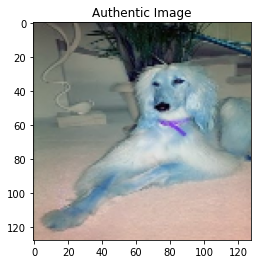

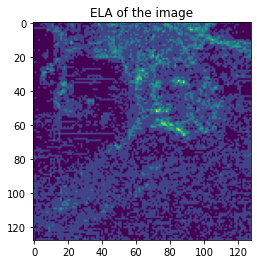

In [14]:
plt.imshow(authentic_images[0])
plt.title('Authentic Image')
plt.show()


plt.title('ELA of the image')
ela_image = compute_ela("data\\traindev\\authentic\\a_0001.jpg")
plt.imshow(ela_image)
plt.show()

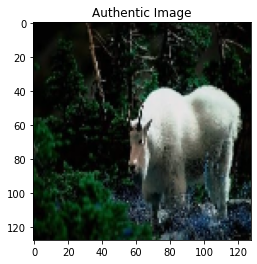

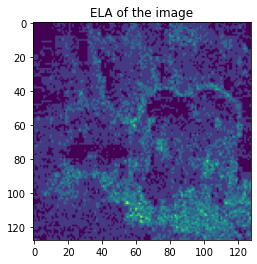

In [15]:
plt.title('Authentic Image')
plt.imshow(authentic_images[2])
plt.show()
plt.title('ELA of the image')
ela_image = compute_ela("data\\traindev\\authentic\\a_0003.jpg")
plt.imshow(ela_image)
plt.show()

Viewing Copy-moved forged images and their ELA

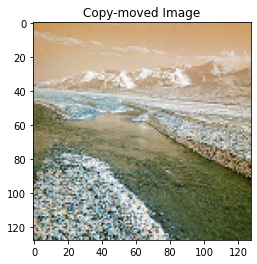

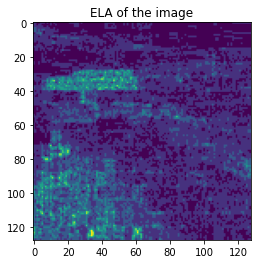

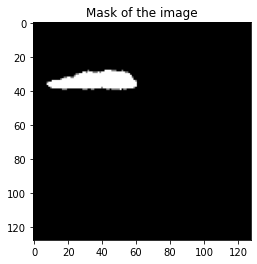

In [16]:
plt.imshow(copy_images[0])
plt.title('Copy-moved Image')
plt.show()


plt.title('ELA of the image')
ela_image = compute_ela("data\\traindev\\copy-moved\\images\\c_0001.tif")
plt.imshow(ela_image)
plt.show()

plt.title('Mask of the image')
plt.imshow(masks_copy[0])
plt.show()

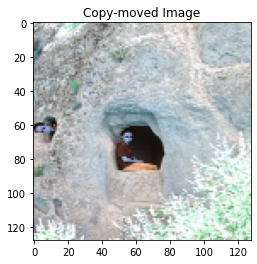

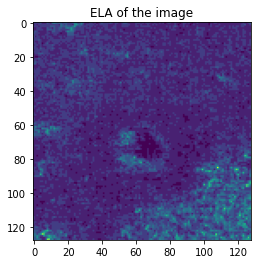

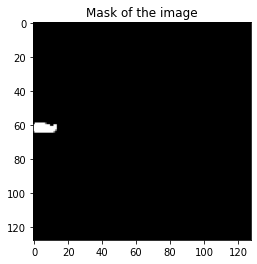

In [17]:
plt.imshow(copy_images[1])
plt.title('Copy-moved Image')
plt.show()


plt.title('ELA of the image')
ela_image = compute_ela("data\\traindev\\copy-moved\\images\\c_0002.jpg")
plt.imshow(ela_image)
plt.show()

plt.title('Mask of the image')
plt.imshow(masks_copy[1])
plt.show()

Viewing splicing forged images

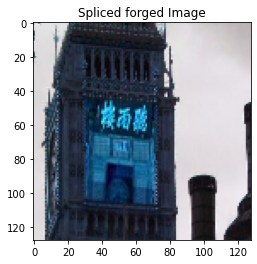

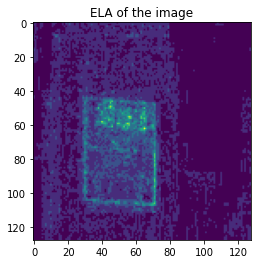

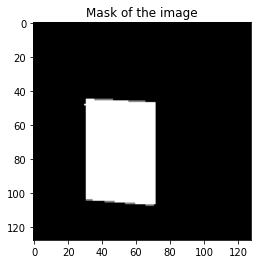

In [18]:
plt.imshow(sliced_images[0])
plt.title('Spliced forged Image')
plt.show()
# "E:\SpoofSense\data\traindev\spliced\images\s_0001.tif"

plt.title('ELA of the image')
ela_image = compute_ela("data\\traindev\\spliced\\images\\s_0001.tif")
plt.imshow(ela_image)
plt.show()

plt.title('Mask of the image')
plt.imshow(masks_spliced[0])
plt.show()

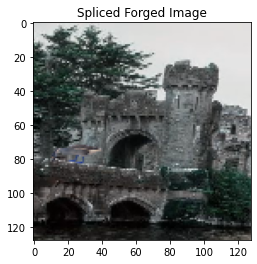

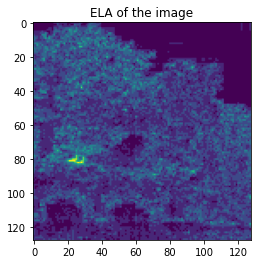

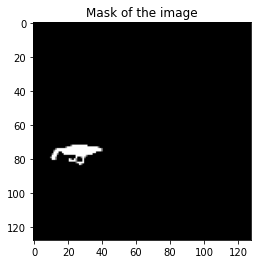

In [19]:
plt.imshow(sliced_images[1])
plt.title('Spliced Forged Image')
plt.show()
# "E:\SpoofSense\data\traindev\spliced\images\s_0001.tif"

plt.title('ELA of the image')
ela_image = compute_ela("data\\traindev\\spliced\\images\\s_0002.tif")
plt.imshow(ela_image)
plt.show()

plt.title('Mask of the image')
plt.imshow(masks_spliced[1])
plt.show()

# Copy Splicing image and mask

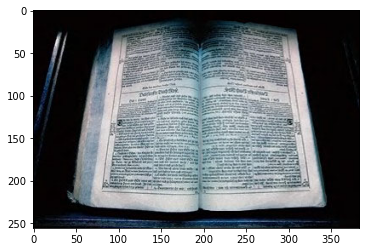

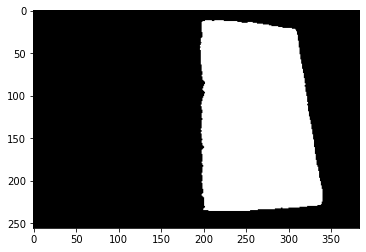

In [20]:
fake_img = cv2.imread("data\\traindev\\copy-moved\\images\\c_0007.jpg")
fake_mask = cv2.imread("data\\traindev\\copy-moved\\masks\\c_0007.png")

plt.imshow(fake_img)
plt.show()
plt.imshow(fake_mask)
plt.show()


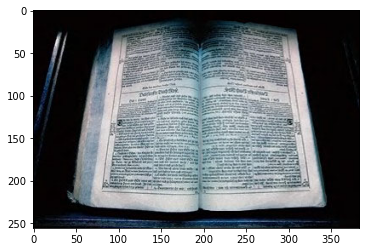

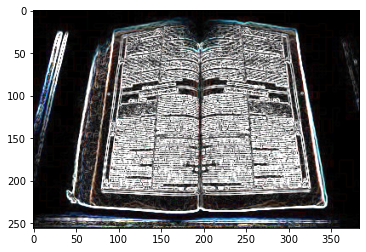

In [21]:


sobel_x = cv2.Sobel(fake_img, cv2.CV_64F, 1, 0, ksize=3)


sobel_y = cv2.Sobel(fake_img, cv2.CV_64F, 0, 1, ksize=3)


gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)


plt.imshow(fake_img)
plt.show()
plt.imshow(gradient_magnitude)
plt.show()



# Creation of the dataset

In [24]:
# from keras.utils import to_categorical


# num_classes = 2

# # labels_normal = labels
# labels = to_categorical(labels2, num_classes)


# print(labels.shape)

Shuffling the dataset to maintain some randomness in the dataset. 

In [25]:
import numpy as np

combined = list(zip(images, labels2))
np.random.shuffle(combined)
shuffled_images, shuffled_labels = zip(*combined)
shuffled_images = np.array(shuffled_images)
shuffled_labels = np.array(shuffled_labels)


The code for getting the ELA of the image.

In [26]:


def compute_ela(image_array, quality):
    temp_path = "ela\\spliced\\temp.jpg"

    # Save the image with a specific quality to create the compressed version
    original_image = Image.fromarray(np.uint8(image_array))

    original_image.save(temp_path, "JPEG", quality=quality)

    # Open the compressed image
    compressed_image = Image.open(temp_path)

    # Compute the difference between the original and compressed images
    ela_image = ImageChops.difference(original_image, compressed_image)

    # Convert the ELA image to grayscale
    ela_image = ela_image.convert("L")

    # Remove the temporary compressed image
    os.remove(temp_path)
    ela_image = ela_image.resize((128,128))
    
    
    ela_image_3d = Image.new("RGB", ela_image.size)
    ela_image_3d.paste(ela_image, (0, 0))

    return np.array(ela_image_3d)

In [27]:
# image_dataset = []
# for image in shuffled_images:
#     ela_image = compute_ela(image)
    
#     patches = extract_patches(np.array(ela_image))
#     processed_patches = preprocess_patches(patches)
#     image_dataset.append(processed_patches)
    

In [28]:
ela_images = []
for image in shuffled_images:
    ela_image = compute_ela(image, 90)
    ela_images.append(ela_image)

In [29]:
ela_images = np.array(ela_images)

In [30]:
# image_dataset = np.array(image_dataset)
# image_dataset.shape

In [31]:
shuffled_labels.shape

(4482,)

In [32]:
ela_images.shape

(4482, 128, 128, 3)

Train test split for the model

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(ela_images, shuffled_labels, random_state = 42)

In [34]:
x_train.shape, x_test.shape

((3361, 128, 128, 3), (1121, 128, 128, 3))

In [35]:
y_train.shape, y_test.shape

((3361,), (1121,))

# MODEL 1

Model architecture inspired from the kaggle notebook https://www.kaggle.com/code/ibrahemnezar/project-image-forgery-ela-rnn-test-23-8-2022

In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Conv2D(filters=128,kernel_size=(5,5),activation='relu',input_shape=(128,128,3)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=256,kernel_size=(5,5),activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
# model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units=1,activation='sigmoid'))






model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary() 
# model.summary()
    
    

    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 128)     9728      
                                                                 
 average_pooling2d (AverageP  (None, 62, 62, 128)      0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 256)       819456    
                                                                 
 average_pooling2d_1 (Averag  (None, 29, 29, 256)      0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 215296)            0         
                                                                 
 dense (Dense)               (None, 64)                1

In [37]:
x_train.shape, y_train.shape
# y_train = np.asarray(train_labels).astype('float32').reshape((-1,1))
# y_train.shape

((3361, 128, 128, 3), (3361,))

Epoch 1/50
84/84 [==============================] - 396s 5s/step - loss: 0.6455 - accuracy: 0.6525 - val_loss: 0.6371 - val_accuracy: 0.6478
Epoch 2/50
84/84 [==============================] - 394s 5s/step - loss: 0.6294 - accuracy: 0.6711 - val_loss: 0.6391 - val_accuracy: 0.6478
Epoch 3/50
84/84 [==============================] - 349s 4s/step - loss: 0.6284 - accuracy: 0.6700 - val_loss: 0.6381 - val_accuracy: 0.6478
Epoch 4/50
84/84 [==============================] - 339s 4s/step - loss: 0.6305 - accuracy: 0.6704 - val_loss: 0.6419 - val_accuracy: 0.6478
Epoch 4: early stopping


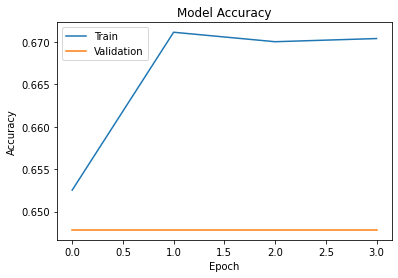

In [38]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Fit the model with early stopping
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.2, callbacks=[early_stopping])

# Plot accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [39]:
predictions = model.predict(x_test)

36/36 [==============================] - 40s 1s/step


In [40]:
len(predictions)

1121

In [42]:
correct_predictions = np.sum(predictions.reshape(-1,1) == y_test.reshape(-1,1))
total_samples = len(predictions)
accuracy = correct_predictions / total_samples

In [43]:
# Evaluate the model on the testing dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the accuracy
print("Test Accuracy:", test_accuracy)


36/36 [==============================] - 25s 700ms/step - loss: 0.6321 - accuracy: 0.6646
Test Accuracy: 0.6645851731300354


# MODEL 2
Model architecture inspired from the research paper https://bv.univ-poitiers.fr/access/content/user/bdiall03/PhD_Image_Forensic_XLIM/Articles/CNN-MF/A%20Deep%20Learning%20Approach%20to%20Detection%20Forgeries%20in%20Images2016.pdf

In [ ]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# from tensorflow.keras.callbacks import EarlyStopping

# model = Sequential()



# model.add(Conv2D(30, (5, 5), activation='relu', strides = (1,1),  input_shape=(128, 128)))
# model.add(Conv2D(30, (5,5), activation = 'relu', strides = (2,2)))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(16, (3, 3),strides = (1,1),  activation='relu'))
# model.add(Conv2D(16, (3, 3), strides = (1,1), activation='relu'))

# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(16, (3, 3), strides = (1,1), activation='relu'))
# model.add(Conv2D(16, (3, 3), strides = (1,1), activation='relu'))
# model.add(Conv2D(16, (3, 3), strides = (1,1), activation='relu'))
# model.add(Conv2D(16, (3, 3), strides = (1,1), activation='relu'))

# model.add(Flatten())

# model.add(Dense(3, activation = 'softmax'))

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model.summary()

In [ ]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# # Fit the model with early stopping
# history = model.fit(x_train, y_train, batch_size=32, epochs=25, validation_split=0.2, callbacks=[early_stopping])

# # Plot accuracy and validation accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

In [ ]:
# predictions = model.predict(x_train)

In [ ]:
# # Evaluate the model on the testing dataset
# test_loss, test_accuracy = model.evaluate(x_test, y_test)

# # Print the accuracy
# print("Test Accuracy:", test_accuracy)


In [44]:
# y_test.shape

# TRANSFER LEARNING

Ideas inspired from the kaggle notebook https://www.kaggle.com/code/masouduut94/forgery-detection-by-using-extracted-ela-features



research paper: http://www.dspace.dtu.ac.in:8080/jspui/bitstream/repository/19175/1/Rashi%20Gupta_M.Tech.pdf

blogs: https://towardsdatascience.com/image-forgery-detection-2ee6f1a65442

Research Paper: https://iopscience.iop.org/article/10.1088/1742-6596/1368/3/032028/pdf


# VGG-16

In [45]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
import tensorflow as tf

In [46]:
tf.config.run_functions_eagerly(True)

In [90]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load the VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False)

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for fine-tuning
x = base_model.output
x = GlobalAveragePooling2D()(x)
# x = Flatten()(x)
x = Dense(512, activation='relu')(x)
# x = Dense(64, activation = 'relu')(x)
predictions = Dense(1, activation='sigmoid')(x)







# Create the final model
model_vgg16 = Model(inputs=base_model.input, outputs=predictions)




# Compile the model
model_vgg16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_vgg16.summary()




Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

In [92]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history = model_vgg16.fit(x_train, y_train, batch_size=32, epochs=50, validation_split = 0.2, callbacks=[early_stopping])



Epoch 1/50
84/84 [==============================] - 877s 10s/step - loss: 0.5892 - accuracy: 0.6905 - val_loss: 0.6138 - val_accuracy: 0.6790
Epoch 2/50
84/84 [==============================] - 920s 11s/step - loss: 0.5539 - accuracy: 0.7080 - val_loss: 0.5968 - val_accuracy: 0.6939
Epoch 3/50
84/84 [==============================] - 792s 9s/step - loss: 0.5368 - accuracy: 0.7288 - val_loss: 0.5866 - val_accuracy: 0.6984
Epoch 4/50
84/84 [==============================] - 753s 9s/step - loss: 0.5137 - accuracy: 0.7489 - val_loss: 0.6076 - val_accuracy: 0.6909
Epoch 5/50
84/84 [==============================] - 746s 9s/step - loss: 0.5031 - accuracy: 0.7515 - val_loss: 0.6425 - val_accuracy: 0.6820
Epoch 6/50
84/84 [==============================] - 734s 9s/step - loss: 0.4980 - accuracy: 0.7541 - val_loss: 0.5910 - val_accuracy: 0.7058
Epoch 6: early stopping


In [93]:
loss, accuracy = model_vgg16.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


36/36 [==============================] - 81s 2s/step - loss: 0.5259 - accuracy: 0.7377
Test Loss: 0.5259062647819519
Test Accuracy: 0.7377341389656067


In [94]:
predictions_vgg = model_vgg16.predict(x_test)


36/36 [==============================] - 86s 2s/step


In [95]:
predicted_labels_vgg = (predictions_vgg >= 0.5).astype(int)

predicted_labels_vgg = predicted_labels_vgg.reshape(-1,1)

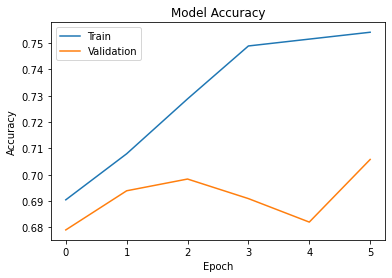

In [97]:
# Plot accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [102]:
with open('vgg16_model.pkl', 'wb') as file:
    pickle.dump(model_vgg16.get_weights(), file)

# RESNET 50

In [103]:
from tensorflow.keras.applications import ResNet50 
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load the VGG16 model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False)

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for fine-tuning
x = base_model.output
x = GlobalAveragePooling2D()(x)
# x = Flatten()(x)
x = Dense(512, activation='relu')(x)
# x = Dense(128, activation = 'relu')(x)

x = Dense(64, activation = 'relu')(x)
predictions = Dense(1, activation='sigmoid')(x)







# Create the final model
model_resnet50 = Model(inputs=base_model.input, outputs=predictions)

model_resnet50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_resnet50.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_6[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                         

                                                                                                  
 conv2_block2_add (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, None, None,   0           ['conv2_block2_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, None, None,   16448       ['conv2_block2_out[0][0]']       
                                64)                                                               
                                                                                                  
 conv2_blo

                                128)                                                              
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_2_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, None, None,   0          ['conv3_block2_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block2_2_relu[0][0]']    
                                512)                                                              
          

 conv4_block1_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, None, None,   0          ['conv4_block1_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block1_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_2_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block3_add (Add)         (None, None, None,   0           ['conv4_block2_out[0][0]',       
                                1024)                             'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_block3_out (Activation)  (None, None, None,   0           ['conv4_block3_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_blo

 ization)                       256)                                                              
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, None, None,   0          ['conv4_block6_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block6_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       1024)                                                             
          

 conv5_block3_1_conv (Conv2D)   (None, None, None,   1049088     ['conv5_block2_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, None, None,   2048       ['conv5_block3_1_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             512)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   2359808     ['conv5_block3_1_relu[0][0]']    
          

In [59]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history = model_resnet50.fit(x_train, y_train, batch_size=32, epochs=50, validation_split = 0.2, callbacks=[early_stopping])


Epoch 1/50
84/84 [==============================] - 371s 4s/step - loss: 0.5960 - accuracy: 0.6749 - val_loss: 0.6106 - val_accuracy: 0.6538
Epoch 2/50
84/84 [==============================] - 380s 5s/step - loss: 0.5541 - accuracy: 0.7121 - val_loss: 0.5879 - val_accuracy: 0.6805
Epoch 3/50
84/84 [==============================] - 361s 4s/step - loss: 0.5253 - accuracy: 0.7333 - val_loss: 0.6217 - val_accuracy: 0.6731
Epoch 4/50
84/84 [==============================] - 360s 4s/step - loss: 0.5097 - accuracy: 0.7400 - val_loss: 0.6086 - val_accuracy: 0.6686
Epoch 5/50
84/84 [==============================] - 359s 4s/step - loss: 0.5020 - accuracy: 0.7448 - val_loss: 0.6014 - val_accuracy: 0.6880
Epoch 5: early stopping


In [61]:
loss, accuracy = model_resnet50.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


36/36 [==============================] - 36s 1s/step - loss: 0.5375 - accuracy: 0.7315
Test Loss: 0.5375111699104309
Test Accuracy: 0.7314897179603577


In [77]:
predictions_resnet = model_resnet50.predict(x_test)

36/36 [==============================] - 36s 993ms/step


In [ ]:
predicted_label_resnet50 = (predictions_resnet >= 0.5).astype(int)
predicted_label_resnet50 = predicted_label_resnet50.reshape(-1,1)

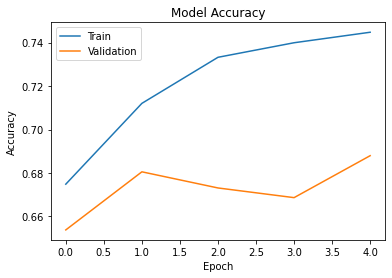

In [76]:
# Plot accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Saving the model.

# RESNET-101

In [104]:
from tensorflow.keras.applications import ResNet101 
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load the VGG16 model with pre-trained weights
base_model = ResNet101(weights='imagenet', include_top=False)

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for fine-tuning
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(2048, activation='relu')(x)


x = Dense(64, activation = 'relu')(x)
predictions = Dense(1, activation='sigmoid')(x)







# Create the final model
model_resnet101 = Model(inputs=base_model.input, outputs=predictions)

model_resnet101.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_resnet101.summary()

171446536/171446536 [==============================] - 15s 0us/step
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_7[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                        

 conv2_block2_3_bn (BatchNormal  (None, None, None,   1024       ['conv2_block2_3_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv2_block2_add (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, None, None,   0           ['conv2_block2_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, None, None,   16448       ['conv2_block2_out[0][0]']       
          

                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, None, None,   147584      ['conv3_block2_1_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_2_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, None, None,   0          ['conv3_block2_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_blo

                                256)                                                              
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, None, None,   0          ['conv4_block1_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block1_1_relu[0][0]']    
                                256)                                                              
          

 conv4_block3_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block3_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block3_add (Add)         (None, None, None,   0           ['conv4_block2_out[0][0]',       
                                1024)                             'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_block3_out (Activation)  (None, None, None,   0           ['conv4_block3_add[0][0]']       
          

                                                                                                  
 conv4_block6_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block6_2_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, None, None,   0          ['conv4_block6_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block6_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_blo

 ization)                       256)                                                              
                                                                                                  
 conv4_block9_1_relu (Activatio  (None, None, None,   0          ['conv4_block9_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block9_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block9_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block9_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block9_2_conv[0][0]']    
 ization)                       256)                                                              
          

 conv4_block11_out (Activation)  (None, None, None,   0          ['conv4_block11_add[0][0]']      
                                1024)                                                             
                                                                                                  
 conv4_block12_1_conv (Conv2D)  (None, None, None,   262400      ['conv4_block11_out[0][0]']      
                                256)                                                              
                                                                                                  
 conv4_block12_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block12_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block12_1_relu (Activati  (None, None, None,   0          ['conv4_block12_1_bn[0][0]']     
 on)      

                                                                                                  
 conv4_block14_3_bn (BatchNorma  (None, None, None,   4096       ['conv4_block14_3_conv[0][0]']   
 lization)                      1024)                                                             
                                                                                                  
 conv4_block14_add (Add)        (None, None, None,   0           ['conv4_block13_out[0][0]',      
                                1024)                             'conv4_block14_3_bn[0][0]']     
                                                                                                  
 conv4_block14_out (Activation)  (None, None, None,   0          ['conv4_block14_add[0][0]']      
                                1024)                                                             
                                                                                                  
 conv4_blo

 lization)                      256)                                                              
                                                                                                  
 conv4_block17_2_relu (Activati  (None, None, None,   0          ['conv4_block17_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block17_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block17_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_block17_3_bn (BatchNorma  (None, None, None,   4096       ['conv4_block17_3_conv[0][0]']   
 lization)                      1024)                                                             
          

 conv4_block20_1_relu (Activati  (None, None, None,   0          ['conv4_block20_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, None, None,   590080      ['conv4_block20_1_relu[0][0]']   
                                256)                                                              
                                                                                                  
 conv4_block20_2_bn (BatchNorma  (None, None, None,   1024       ['conv4_block20_2_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block20_2_relu (Activati  (None, None, None,   0          ['conv4_block20_2_bn[0][0]']     
 on)      

                                                                                                  
 conv4_block23_1_conv (Conv2D)  (None, None, None,   262400      ['conv4_block22_out[0][0]']      
                                256)                                                              
                                                                                                  
 conv4_block23_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block23_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block23_1_relu (Activati  (None, None, None,   0          ['conv4_block23_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_blo

 n)                             512)                                                              
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, None, None,   1050624     ['conv5_block2_2_relu[0][0]']    
                                2048)                                                             
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, None, None,   8192       ['conv5_block2_3_conv[0][0]']    
 ization)                       2048)                                                             
                                                                                                  
 conv5_block2_add (Add)         (None, None, None,   0           ['conv5_block1_out[0][0]',       
                                2048)                             'conv5_block2_3_bn[0][0]']      
          

In [105]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history = model_resnet101.fit(x_train, y_train, batch_size=32, epochs=50, validation_split = 0.2, callbacks=[early_stopping])


Epoch 1/50
84/84 [==============================] - 693s 8s/step - loss: 0.6064 - accuracy: 0.6726 - val_loss: 0.6196 - val_accuracy: 0.6790
Epoch 2/50
84/84 [==============================] - 795s 9s/step - loss: 0.5561 - accuracy: 0.7117 - val_loss: 0.6517 - val_accuracy: 0.6493
Epoch 3/50
84/84 [==============================] - 654s 8s/step - loss: 0.5319 - accuracy: 0.7307 - val_loss: 0.6140 - val_accuracy: 0.6820
Epoch 4/50
84/84 [==============================] - 643s 8s/step - loss: 0.5125 - accuracy: 0.7314 - val_loss: 0.6315 - val_accuracy: 0.6790
Epoch 5/50
84/84 [==============================] - 718s 9s/step - loss: 0.4985 - accuracy: 0.7422 - val_loss: 0.6291 - val_accuracy: 0.6790
Epoch 6/50
84/84 [==============================] - 730s 9s/step - loss: 0.4800 - accuracy: 0.7500 - val_loss: 0.6143 - val_accuracy: 0.6835
Epoch 6: early stopping


In [106]:
loss, accuracy = model_resnet101.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

36/36 [==============================] - 79s 2s/step - loss: 0.5680 - accuracy: 0.7119
Test Loss: 0.5679839849472046
Test Accuracy: 0.7118644118309021


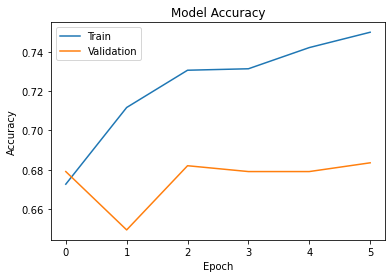

In [109]:
# Plot accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# ENSEMBLE OF VGG-16, RESNET-50 and RESNET-101

In [113]:
with open('model_resnet101.pkl', 'rb') as file:
    saved_weights = pickle.load(file)
model_resnet101.set_weights(saved_weights)

In [114]:
with open('model_resnet50.pkl', 'rb') as file:
    saved_weights = pickle.load(file)
model_resnet50.set_weights(saved_weights)

In [118]:
with open('vgg16_model.pkl', 'rb') as file:
    saved_weights = pickle.load(file)
model.set_weights(saved_weights)

In [125]:
from sklearn.ensemble import VotingClassifier
predictions1 = model_resnet101.predict(x_test)
predictions2 = model_resnet50.predict(x_test)
predictions3 = model.predict(x_test)

# Step 3: Combine predictions using voting (majority vote)
# Voting based on class labels (0 or 1 in this example)
ensemble_predictions = np.round((predictions1 + predictions2 + predictions3) / 3.0).astype(int)






C:\Users\schai\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


36/36 [==============================] - 69s 2s/step


In [130]:
correct_predictions = np.sum(ensemble_predictions.reshape(-1,1) == y_test.reshape(-1,1))
total_samples = len(ensemble_predictions)
accuracy = correct_predictions / total_samples

In [133]:
accuracy

0.7368421052631579

# Result Analysis

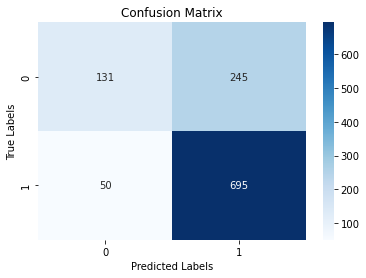

In [134]:
import seaborn as sns
from sklearn.metrics import confusion_matrix



cm = confusion_matrix(y_test.reshape(-1,1), ensemble_predictions.reshape(-1,1))


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')


plt.show()


As we can see from the above confusion matrix, there is a bias between authentic images and forged images.

# Model for detecting the type of forgery

In [146]:
def sobel_edge_detector(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)


    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)


    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)
    
    return gradient_magnitude




In [142]:
forged_labels2 = [x-1 for x in forged_labels]

In [153]:


combined = list(zip(forged_images, forged_labels2))
np.random.shuffle(combined)
shuffled_images_forged, shuffled_labels_forged = zip(*combined)
shuffled_images_forged = np.array(shuffled_images_forged)
shuffled_labels_forged = np.array(shuffled_labels_forged)


In [196]:
edge_images = []

for image in forged_images:
    edge_img = compute_ela(image, 90)
    edge_images.append(edge_img)

In [197]:
edge_images = np.array(edge_images)


In [198]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(edge_images, shuffled_labels_forged, random_state = 42)

In [199]:
x_train.shape, x_test.shape

((2241, 128, 128, 3), (747, 128, 128, 3))

In [200]:
y_train.shape, y_test.shape

((2241,), (747,))

In [201]:

# Load the VGG16 model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False)

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for fine-tuning
x = base_model.output
x = GlobalAveragePooling2D()(x)
# x = Flatten()(x)
x = Dense(2048, activation='relu')(x)
x = Dense(64, activation = 'relu')(x)
predictions = Dense(1, activation='sigmoid')(x)







# Create the final model
model_resnet50_forged = Model(inputs=base_model.input, outputs=predictions)

model_resnet50_forged.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_resnet50_forged.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_11[0][0]']               
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

                                                                                                  
 conv2_block2_add (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, None, None,   0           ['conv2_block2_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, None, None,   16448       ['conv2_block2_out[0][0]']       
                                64)                                                               
                                                                                                  
 conv2_blo

                                128)                                                              
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_2_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, None, None,   0          ['conv3_block2_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block2_2_relu[0][0]']    
                                512)                                                              
          

 conv4_block1_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, None, None,   0          ['conv4_block1_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block1_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_2_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block3_add (Add)         (None, None, None,   0           ['conv4_block2_out[0][0]',       
                                1024)                             'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_block3_out (Activation)  (None, None, None,   0           ['conv4_block3_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_blo

 ization)                       256)                                                              
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, None, None,   0          ['conv4_block6_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block6_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       1024)                                                             
          

 conv5_block3_1_conv (Conv2D)   (None, None, None,   1049088     ['conv5_block2_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, None, None,   2048       ['conv5_block3_1_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             512)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   2359808     ['conv5_block3_1_relu[0][0]']    
          

In [202]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history = model_resnet50_forged.fit(x_train, y_train, batch_size=32, epochs=50, validation_split = 0.2, callbacks=[early_stopping])


Epoch 1/50


C:\Users\schai\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


56/56 [==============================] - 259s 5s/step - loss: 0.7543 - accuracy: 0.5028 - val_loss: 0.7355 - val_accuracy: 0.5011
Epoch 2/50
56/56 [==============================] - 264s 5s/step - loss: 0.6896 - accuracy: 0.5324 - val_loss: 0.7162 - val_accuracy: 0.4833
Epoch 3/50
 9/56 [===>..........................] - ETA: 3:57 - loss: 0.6671 - accuracy: 0.5903


KeyboardInterrupt

